In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [3]:

data = pd.read_csv("dt_reg.csv")

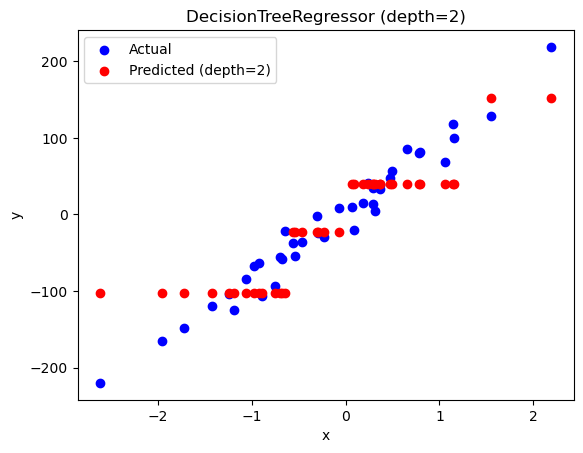

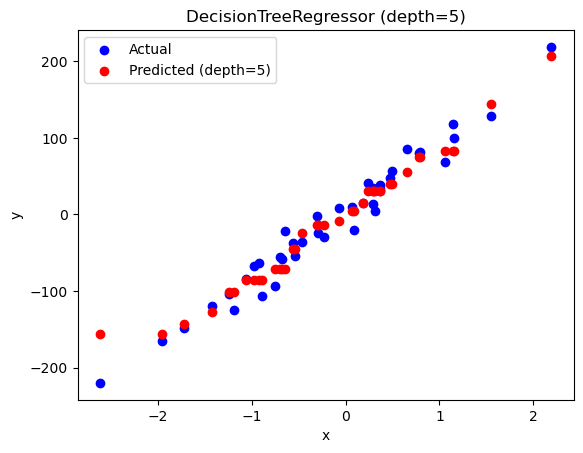

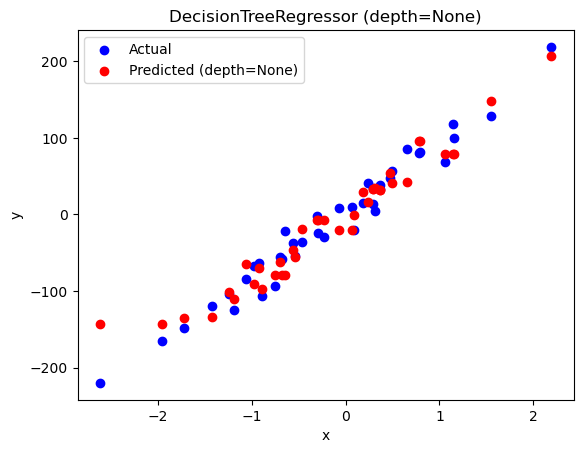

Depth=2: RMSE=40.5342
Depth=5: RMSE=19.9111
Depth=None: RMSE=23.7960


In [4]:
X = data[['x']]
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

depths = [2, 5, None]
rmse_scores = {}

for d in depths:
    model = DecisionTreeRegressor(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores[d] = rmse

    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.scatter(X_test, y_pred, color='red', label=f'Predicted (depth={d})')
    plt.title(f"DecisionTreeRegressor (depth={d})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

for d, score in rmse_scores.items():
    print(f"Depth={d}: RMSE={score:.4f}")